**Data Analysis and Visualization**

In this section, the results obtained in "model_run" will be analyzed and visualized.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Upload Necessary Data**

<class 'pandas.core.frame.DataFrame'>


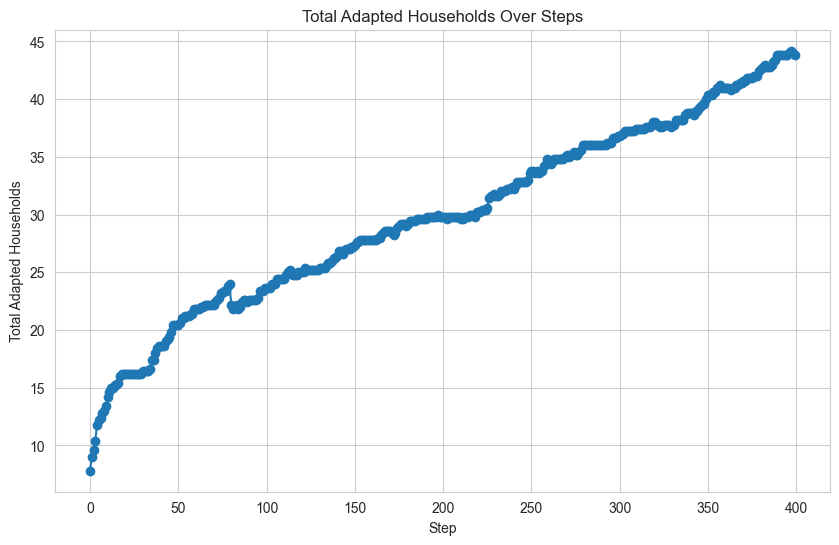

In [2]:
# upload the data with the following code
model_dataframe_initial = pd.read_csv(f"../result_extremevalue/{'model_results_no_subsidy'}.csv")
model_dataframe_income_threshold = pd.read_csv(f"../result_extremevalue/{'model_sensitivity_results_income_threshold'}.csv")
model_dataframe_saving_threshold = pd.read_csv(f"../result_extremevalue/{'model_sensitivity_results_saving_threshold'}.csv")
model_dataframe_subsidy_rate = pd.read_csv(f"../result_extremevalue/{'model_sensitivity_results_subsidy_rate'}.csv")
model_dataframe_flood_prob = pd.read_csv(f"../result_extremevalue/{'model_sensitivity_results_flood_prob'}.csv")

# Group by the "step" column and calculate the mean of "total_adapted_households" and "replication/seed"
grouped_data = model_dataframe_initial.groupby('Step').agg('mean').reset_index()
grouped_data_1 = model_dataframe_income_threshold.groupby('Step').agg('mean').reset_index()
grouped_data_2 = model_dataframe_saving_threshold.groupby('Step').agg('mean').reset_index()
grouped_data_3 = model_dataframe_subsidy_rate.groupby('Step').agg('mean').reset_index()
grouped_data_4= model_dataframe_flood_prob.groupby('Step').agg('mean').reset_index()

# The grouped_data DataFrame now contains the average values for each unique "step" value
# print(grouped_data)


# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Step'], grouped_data['total_adapted_households'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Total Adapted Households Over Steps')

# Show the grid
plt.grid(True)

# Display the chart
plt.show()

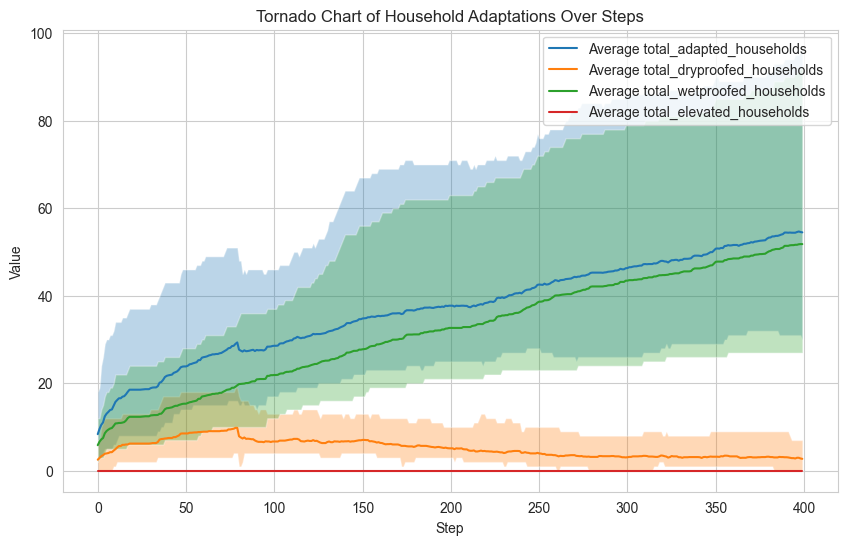

In [3]:
grouped = model_dataframe_income_threshold.groupby('Step').agg({
    'total_adapted_households': ['mean', 'min', 'max'],
    'total_dryproofed_households': ['mean', 'min', 'max'],
    'total_wetproofed_households': ['mean', 'min', 'max'],
    'total_elevated_households': ['mean', 'min', 'max']
})

# Reset index to make 'Step' a column
grouped = grouped.reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# For each feature, plot the mean line and the shadow area
for feature in ['total_adapted_households', 'total_dryproofed_households', 
                'total_wetproofed_households', 'total_elevated_households']:
    plt.plot(grouped['Step'], grouped[feature]['mean'], label=f'Average {feature}')
    plt.fill_between(grouped['Step'], grouped[feature]['min'], grouped[feature]['max'], alpha=0.3)

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Tornado Chart of Household Adaptations Over Steps')
plt.legend()
plt.show()

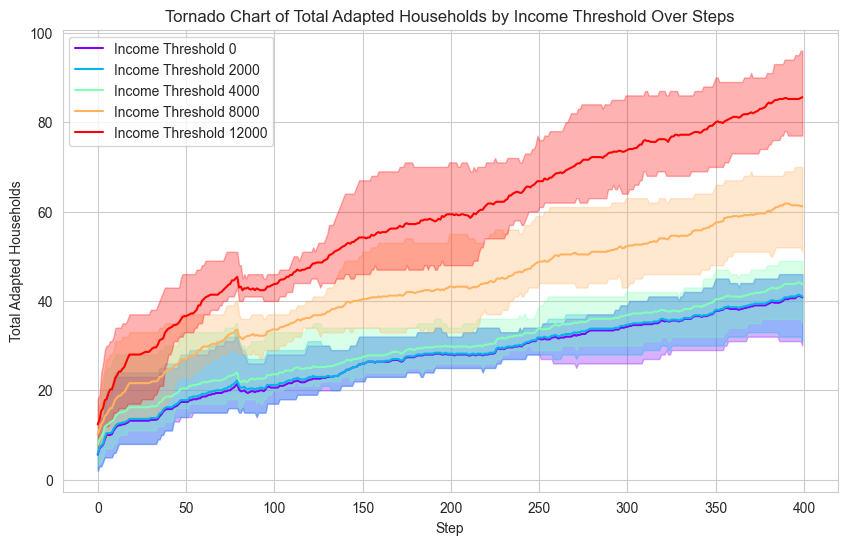

In [4]:
model_dataframe_income_threshold = pd.read_csv(f"../result_extremevalue/{'model_sensitivity_results_income_threshold'}.csv")
# Group by 'Step' and 'income_threshold', then calculate the mean, min, and max for 'total_adapted_households'
grouped = model_dataframe_income_threshold.groupby(['Step', 'income_threshold'])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

# Get unique income_threshold values for color differentiation
income_thresholds = grouped['income_threshold'].unique()

# Create a color map to assign different colors for each income_threshold
color_map = plt.cm.rainbow(np.linspace(0, 1, len(income_thresholds)))

plt.figure(figsize=(10, 6))

# Plot each income_threshold in different colors
for income_threshold, color in zip(income_thresholds, color_map):
    # Subset the DataFrame for the current income_threshold
    subset = grouped[grouped['income_threshold'] == income_threshold]

    # Plot the mean line for total_adapted_households
    plt.plot(subset['Step'], subset['mean'], label=f'Income Threshold {income_threshold}', color=color)

    # Create the shadow area for the same income_threshold
    plt.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Tornado Chart of Total Adapted Households by Income Threshold Over Steps')
plt.legend()
plt.show()

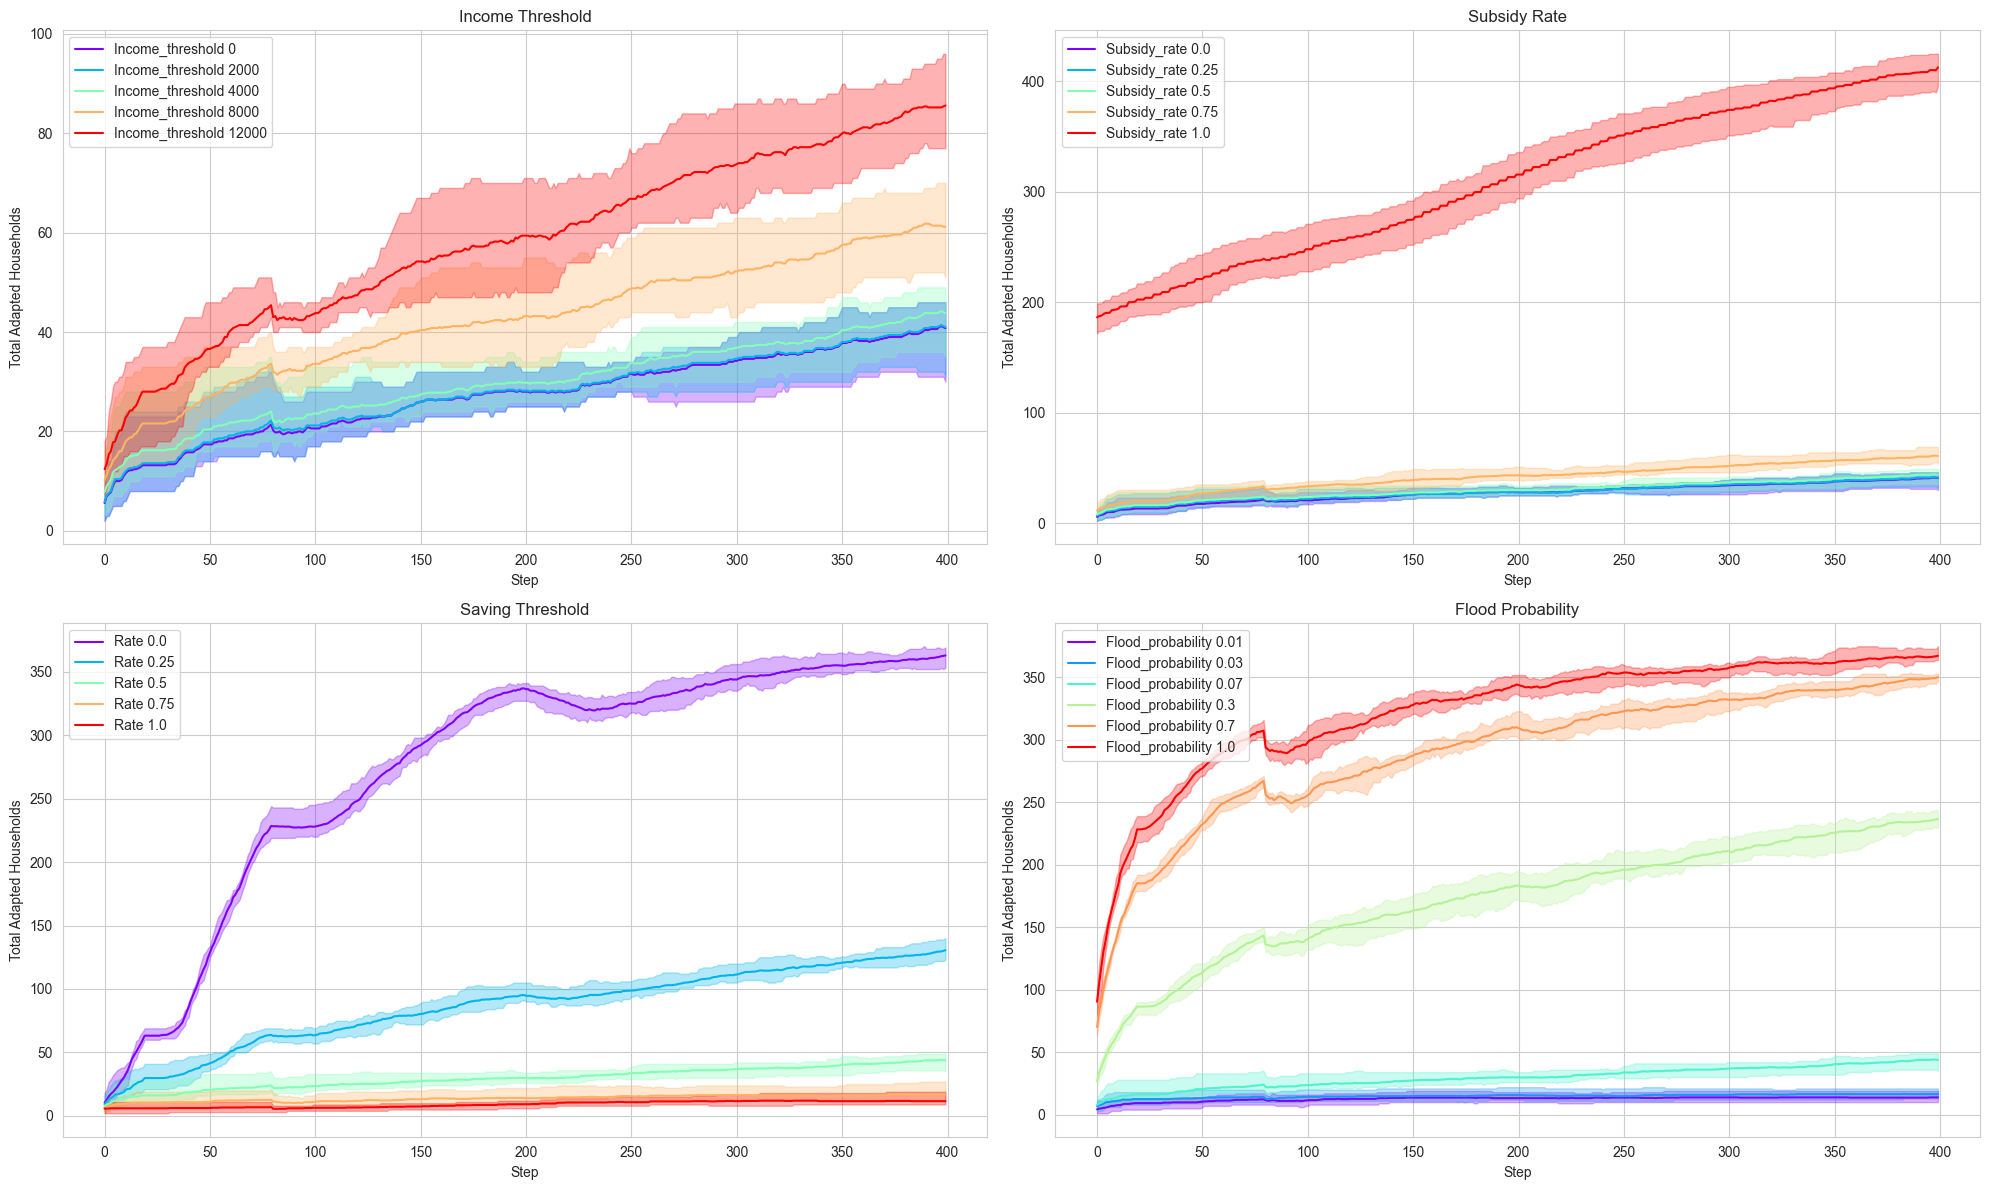

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def group_data(df, group_column):
    return df.groupby(['Step', group_column])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

def plot_data(grouped, group_column, ax, title):
    unique_values = grouped[group_column].unique()
    color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_values)))

    for value, color in zip(unique_values, color_map):
        subset = grouped[grouped[group_column] == value]
        ax.plot(subset['Step'], subset['mean'], label=f'{group_column.capitalize()} {value}', color=color)
        ax.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

    ax.set_xlabel('Step')
    ax.set_ylabel('Total Adapted Households')
    ax.set_title(title)
    ax.legend()

# Read dataframes
model_dataframe_income_threshold = pd.read_csv("../result_extremevalue/model_sensitivity_results_income_threshold.csv")
model_dataframe_subsidy_rate = pd.read_csv("../result_extremevalue/model_sensitivity_results_subsidy_rate.csv")
model_dataframe_saving_threshold = pd.read_csv("../result_extremevalue/model_sensitivity_results_saving_threshold.csv")
model_dataframe_flood_prob = pd.read_csv("../result_extremevalue/model_sensitivity_results_flood_prob.csv")

# Group data
grouped_income = group_data(model_dataframe_income_threshold, 'income_threshold')
grouped_subsidy = group_data(model_dataframe_subsidy_rate, 'subsidy_rate')
grouped_saving = group_data(model_dataframe_saving_threshold, 'rate')
grouped_flood = group_data(model_dataframe_flood_prob, 'flood_probability')

# Create figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 12)) # Adjust the number of rows and columns as needed

# Plot data
plot_data(grouped_income, 'income_threshold', axs[0, 0], 'Income Threshold')
plot_data(grouped_subsidy, 'subsidy_rate', axs[0, 1], 'Subsidy Rate')
plot_data(grouped_saving, 'rate', axs[1, 0], 'Saving Threshold')
plot_data(grouped_flood, 'flood_probability', axs[1, 1], 'Flood Probability')

plt.tight_layout()
plt.show()
